### **Import Libraries**

In [36]:
#import Libraries
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


### **Load Dataset**

In [56]:
# Load the dataset
df = pd.read_csv('../data/processed/crop_data_with_features.csv')

# Display basic information

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")



Dataset Shape: 8800 rows × 31 columns

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'NPK_ratio', 'NP_ratio', 'NK_ratio', 'PK_ratio', 'nutrient_sum', 'nutrient_balance', 'nutrient_dominance', 'temp_humidity_index', 'heat_stress_index', 'water_stress_index', 'moisture_availability', 'evapotranspiration', 'ph_deviation_neutral', 'acidic_soil', 'alkaline_soil', 'climate_zone', 'rainfall_category', 'N_category', 'P_category', 'K_category', 'tropical_suitability', 'temperate_suitability', 'arid_suitability']


In [ ]:
N,P,K,temperature,humidity,ph,rainfall,label,NPK_ratio,NP_ratio,NK_ratio,PK_ratio,nutrient_sum,nutrient_balance,nutrient_dominance,temp_humidity_index,heat_stress_index,water_stress_index,moisture_availability,evapotranspiration,ph_deviation_neutral,acidic_soil,alkaline_soil,climate_zone,rainfall_category,N_category,P_category,K_category,tropical_suitability,temperate_suitability,arid_suitability

In [37]:
# Load the dataset
df = pd.read_csv('../data/raw/Crop_recommendation.csv')

# Display basic information

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")



Dataset Shape: 8800 rows × 8 columns

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [38]:
# Display first 10 rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


### **Data Types & Info**

In [39]:
# Check data types and missing values
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8800 non-null   int64  
 1   P            8800 non-null   int64  
 2   K            8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph           8800 non-null   float64
 6   rainfall     8800 non-null   float64
 7   label        8800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 550.1+ KB
None


### **Check for Missing Values**

In [40]:
# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing values in the dataset.")
else:
    print(f"Total missing values: {missing_values.sum()}")

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No missing values in the dataset.


### **Stats**

In [41]:
# Statistical summary of numerical features
print("Statistical Summary of Features:")
df.describe().round(2)

Statistical Summary of Features:


,N,P,K,temperature,humidity,ph,rainfall
count,8800.00,8800.00,8800.00,8800.00,8800.00,8800.00,8800.00
mean,55.08,51.44,40.48,26.77,71.44,6.61,100.67
std,37.06,27.97,38.56,5.32,22.76,0.88,56.02
min,0.00,4.00,5.00,8.83,14.26,3.50,20.21
25%,25.00,30.00,20.00,23.83,58.19,6.08,60.75
50%,42.00,51.00,29.00,26.92,79.96,6.57,90.40
75%,89.00,66.00,46.00,29.77,89.42,7.09,122.70
max,149.00,150.00,206.00,46.73,104.98,10.23,298.56


### **Target var analysis**

In [42]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [43]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts
8799,25,55,22,33.191011,52.475590,6.727969,32.812965,groundnuts


In [44]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [45]:
# Analyze the target variable
print("Target Variable Analysis (Crop Types):")

crop_counts = df['label'].value_counts()
print(f"\nTotal unique crops: {df['label'].nunique()}")
print(f"\nCrop distribution:")
print(crop_counts)

print("\nCrops in dataset:")
print(", ".join(sorted(df['label'].unique())))

Target Variable Analysis (Crop Types):

Total unique crops: 22

Crop distribution:
label
rice           400
maize          400
chickpea       400
kidneybeans    400
pigeonpeas     400
mothbeans      400
mungbean       400
blackgram      400
lentil         400
pomegranate    400
banana         400
mango          400
grapes         400
watermelon     400
muskmelon      400
orange         400
papaya         400
coconut        400
cotton         400
jute           400
coffee         400
groundnuts     400
Name: count, dtype: int64

Crops in dataset:
banana, blackgram, chickpea, coconut, coffee, cotton, grapes, groundnuts, jute, kidneybeans, lentil, maize, mango, mothbeans, mungbean, muskmelon, orange, papaya, pigeonpeas, pomegranate, rice, watermelon


### **Class balance**

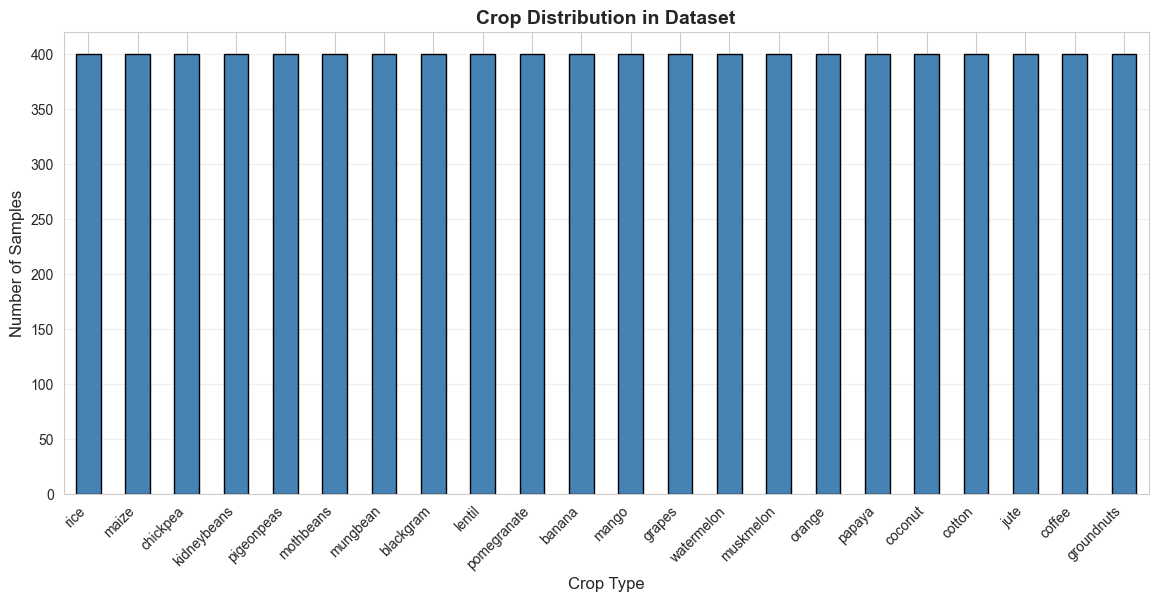


Samples per crop: Min=400, Max=400
Dataset is well-balanced!


In [46]:
# Check if classes are balanced
plt.figure(figsize=(14, 6))

# Bar plot
crop_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Crop Distribution in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.savefig('../results/figures/crop_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Check balance
samples_per_crop = df['label'].value_counts()
print(f"\nSamples per crop: Min={samples_per_crop.min()}, Max={samples_per_crop.max()}")
if samples_per_crop.max() / samples_per_crop.min() < 2:
    print("Dataset is well-balanced!")
else:
    print("Dataset has class imbalance.") #Consider stratified sampling.

### **Feature Distribution**

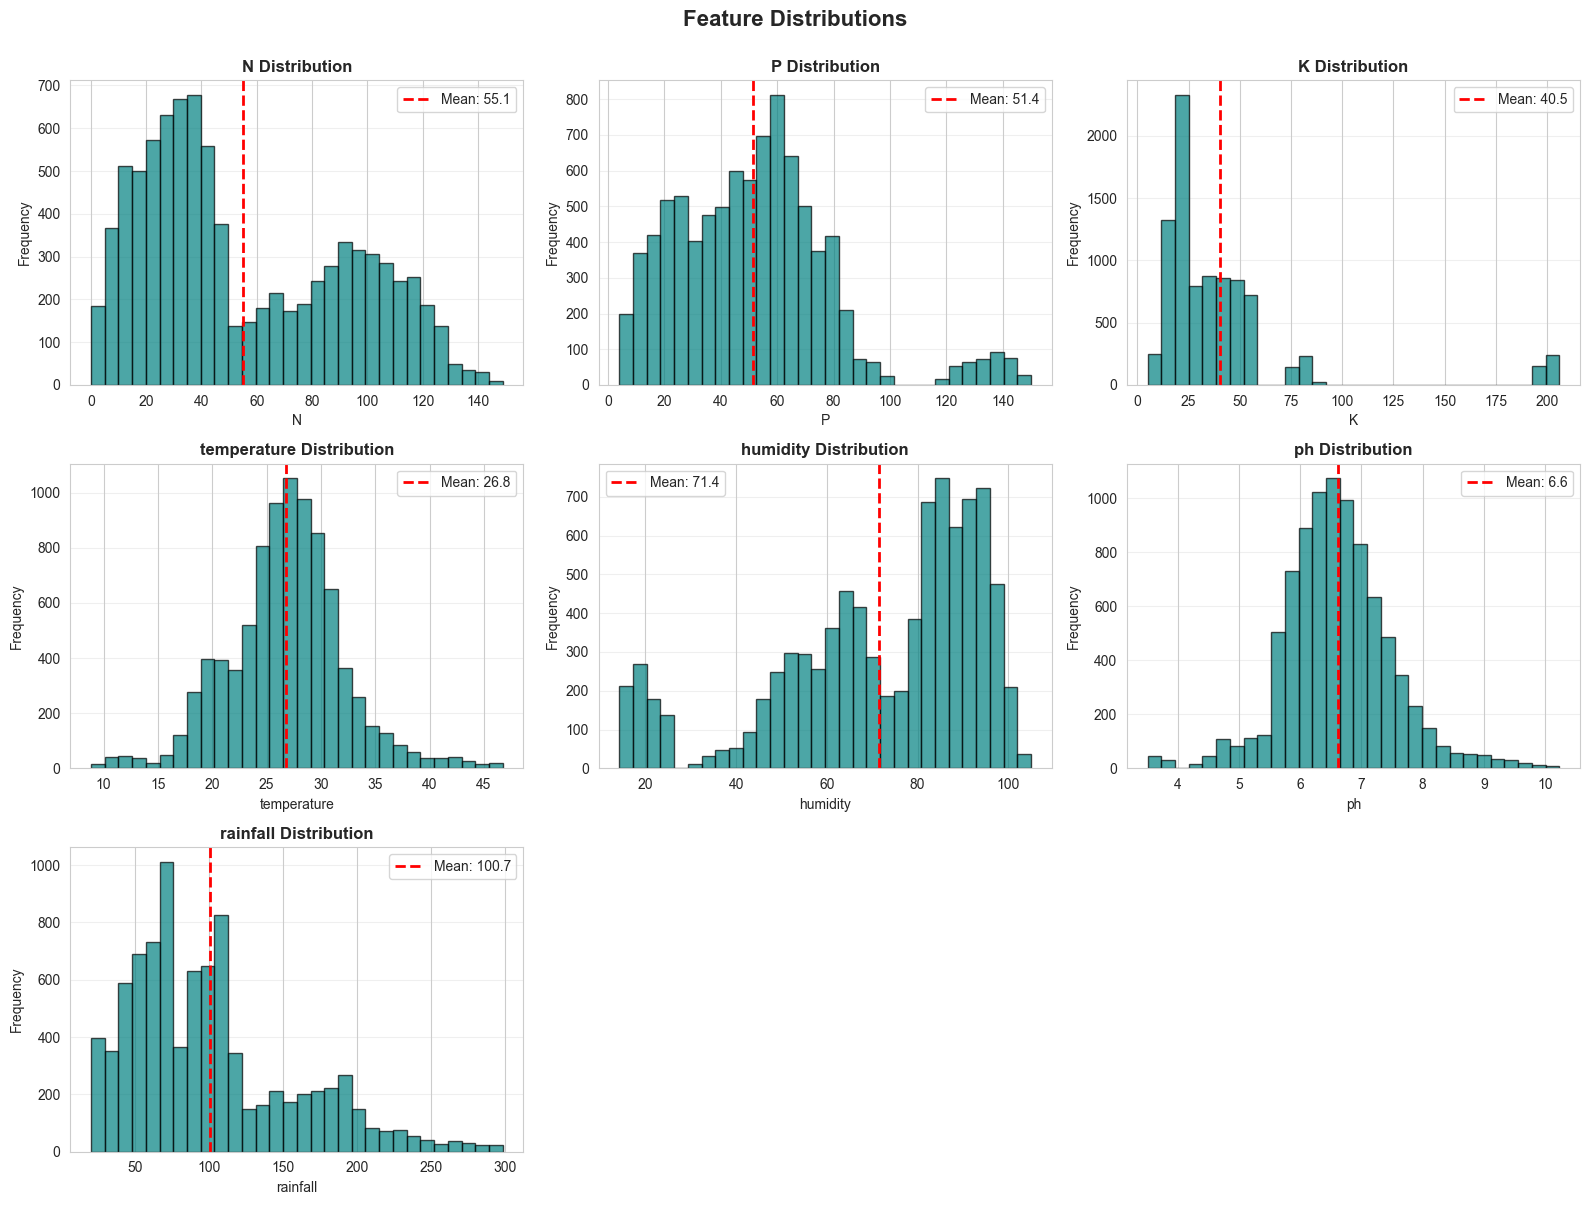

In [47]:
# Distribution of all numerical features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', color='teal', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df[feature].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                     label=f'Mean: {mean_val:.1f}')
    axes[idx].legend()

# Remove extra subplots
for idx in range(len(features), 9):
    fig.delaxes(axes[idx])

plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../results/figures/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### **Insights**
- **N distribution** - Bimodal distribution (two peaks around 20-40 and 80-100)
- **P distribution** - Relatively normal distribution with slight right skew
- **K distribution** - Highly right-skewed (concentRated at low K)
- **Temp distribution** - Normal distribution (wide distr)
- **Humidity distribution** - Slightly Bimodal
- **pH distribution** - Normal* distribution
- **Rainfall distribution** -  Right-skewed with long tail

**Most Discriminative Features (based on distribution variance):**

- Nitrogen (N) - Clear bimodal clusters → High predictive power
- Rainfall - Wide range with distinct groups → Good separator
- Temperature - Normal distribution but wide range → Important
- Humidity - Two preference groups → Moderate importance
- Potassium (K) - Most crops clustered low → Less discriminative
- pH - Narrow range, most crops similar → Lower importance

**What This Means:**

- N, rainfall, and temperature will likely be the top 3 features in your model
- K and pH may have lower feature importance
- You might see crop clusters based on N (low vs high) and rainfall (dry vs wet)

### **Correlation**

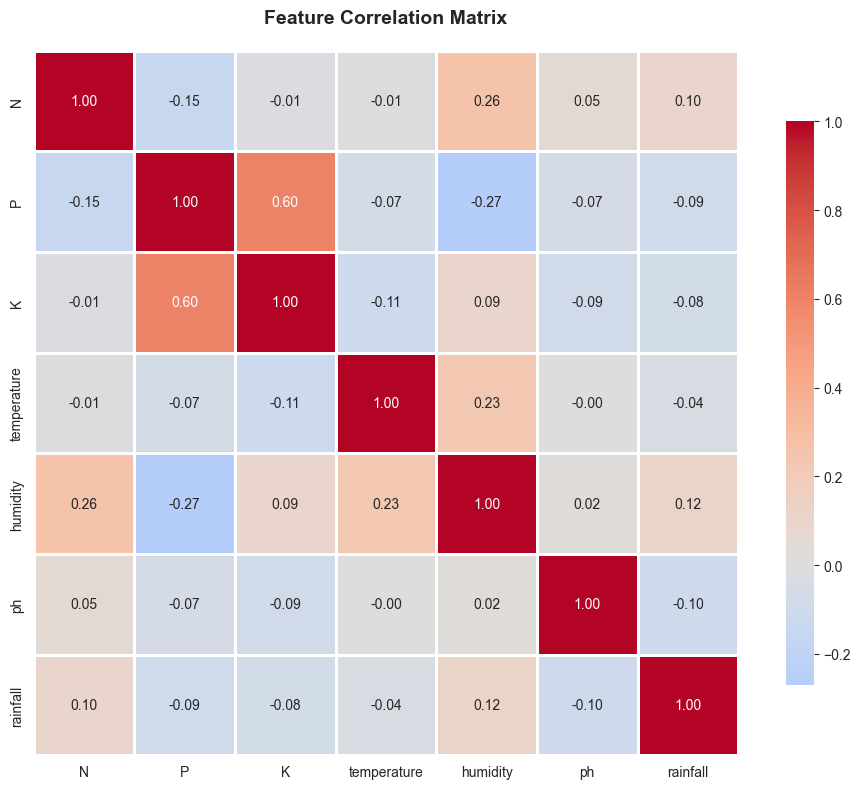


Key Correlation Insights:

Top 5 strongest correlations:
  P ↔ K: 0.600
  P ↔ humidity: -0.270
  N ↔ humidity: 0.256
  temperature ↔ humidity: 0.225
  N ↔ P: -0.152


In [48]:
# Correlation matrix
correlation = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../results/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Correlation Insights:")

# Find strongest correlations (excluding diagonal - relations to itself)
corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        corr_pairs.append((correlation.columns[i], correlation.columns[j], 
                          correlation.iloc[i, j]))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
print("\nTop 5 strongest correlations:")
for feat1, feat2, corr_val in corr_pairs_sorted[:5]:
    print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")

### **Box plots** 
(for detecting outliers)

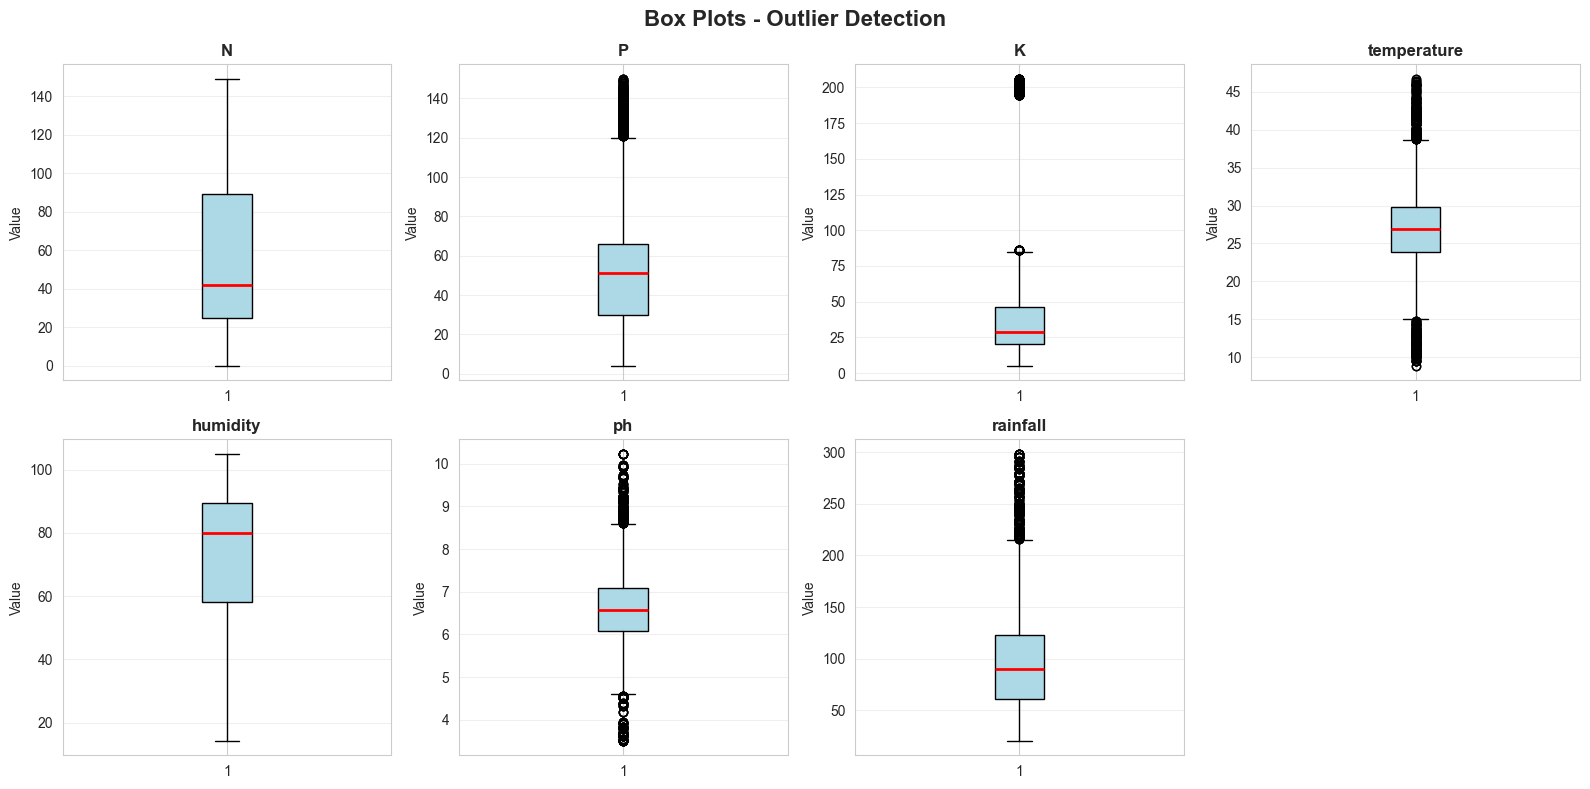

In [49]:
# Box plots to detect outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].boxplot(df[feature], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', edgecolor='black'),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[7])

plt.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

**High Variability (Good for prediction):**
- K (Potassium): Huge range, many outliers
- Rainfall: Extreme differences between crops
- Temperature: Clear climate zones

**Moderate Variability:**
- N, P: Important but more concentrated
- pH: Most crops near-neutral

**Low Variability:**
- Humidity: Most crops in 60-90% range

In [50]:

# Check for humidity >100%
print("Checking for invalid humidity values:")
invalid_humidity = df[df['humidity'] > 100]
if len(invalid_humidity) > 0:
    print(f"Found {len(invalid_humidity)} samples with humidity >100%")
    print(invalid_humidity[['N', 'P', 'K', 'humidity', 'label']])
    # Option: Cap at 100
    # df.loc[df['humidity'] > 100, 'humidity'] = 100
else:
    print("✅ All humidity values are valid (≤100%)")

Checking for invalid humidity values:
Found 86 samples with humidity >100%
       N   P   K    humidity    label
3902  15  27  34  100.430480  coconut
3904  12  17  36  104.628017  coconut
3909  27   6  36  104.147859  coconut
3911  28   9  34  101.783320  coconut
3912  29   7  33  101.284774  coconut
...   ..  ..  ..         ...      ...
8391  30  24  32  104.710211  coconut
8392  12  13  36  104.839052  coconut
8394  36  12  31  103.214347  coconut
8395  31  12  34  100.678243  coconut
8399  28  30  30  103.743293  coconut

[86 rows x 5 columns]


### **Feature Statistics by Crop**

In [51]:
# Average feature values for each crop
crop_stats = df.groupby('label')[features].mean().round(2)

print("Average Feature Values by Crop:")
print(crop_stats)

# Save to CSV for later use
crop_stats.to_csv('../data/processed/crop_requirements_summary.csv')
print("\n Crop requirements summary saved to 'data/processed/crop_requirements_summary.csv'")

Average Feature Values by Crop:
                  N       P       K  temperature  humidity    ph  rainfall
label                                                                     
banana       104.73   84.01   50.55        28.33     82.37  6.07    104.63
blackgram     44.52   69.47   19.74        31.02     66.75  7.24     67.88
chickpea      44.59   69.79   80.42        19.53     17.28  7.45     80.06
coconut       26.48   18.93   31.09        28.37     97.22  6.07    175.69
coffee       105.70   30.74   30.44        26.43     60.34  6.89    158.07
cotton       122.27   48.24   20.06        24.83     81.84  7.02     80.40
grapes        27.68  134.53  200.61        24.68     83.92  6.12     69.61
groundnuts    25.94   50.01   20.73        29.18     54.49  6.96     51.20
jute          82.90   48.86   40.49        25.83     81.63  6.83    174.79
kidneybeans   25.25   69.54   20.55        20.82     22.15  5.84    105.92
lentil        23.27   70.36   19.91        25.37     66.42  7.03    

### **Crop req heatmap**

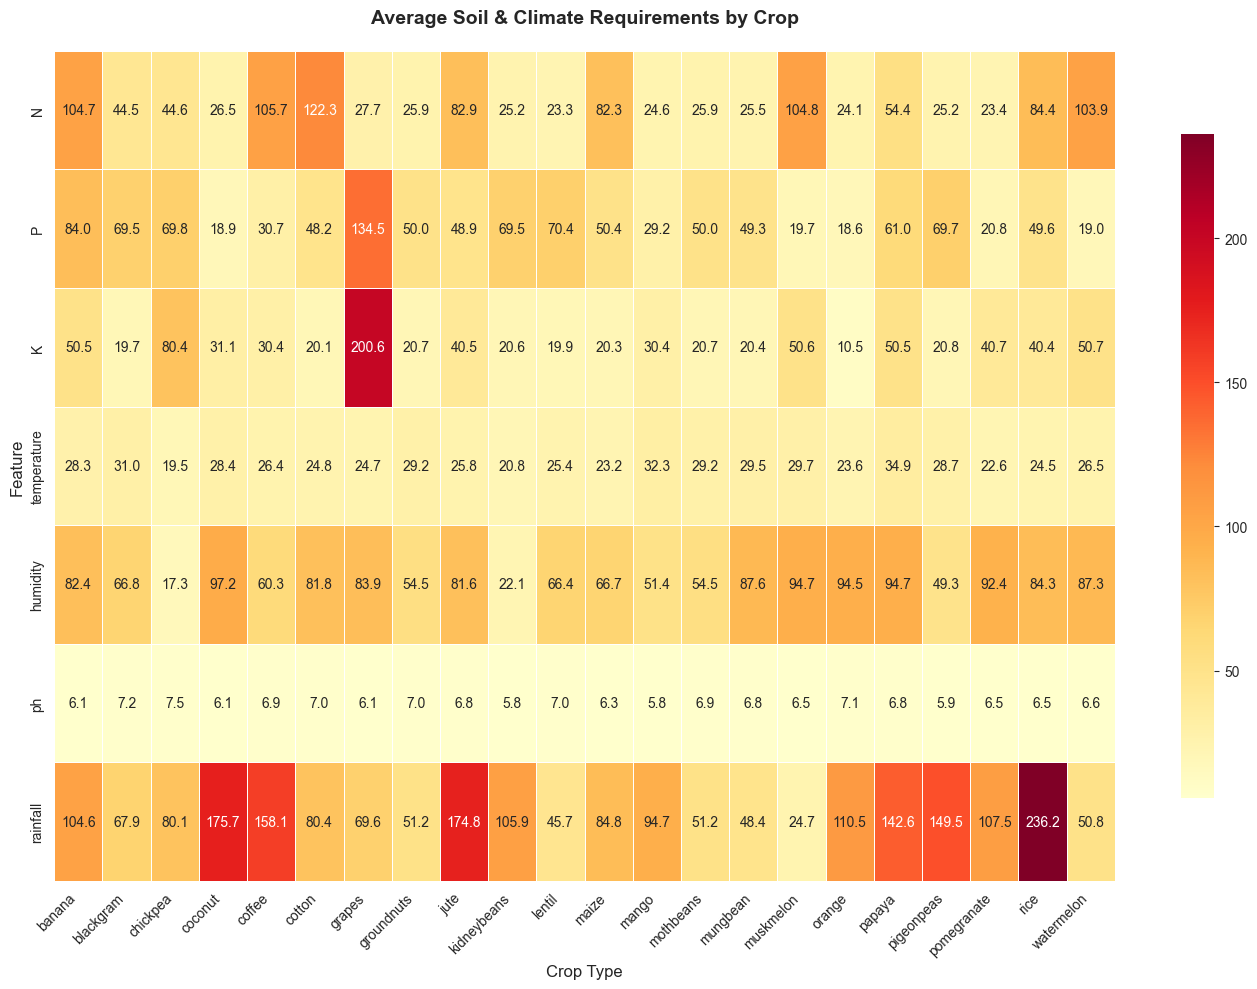

In [52]:
# Heatmap of average requirements by crop
plt.figure(figsize=(14, 10))
sns.heatmap(crop_stats.T, cmap='YlOrRd', annot=True, fmt='.1f', 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Average Soil & Climate Requirements by Crop', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../results/figures/crop_requirements_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### insights

### **Pairplot of Key Features**

Creating pairplot for the crops: rice, maize, chickpea, kidneybeans, pigeonpeas, mothbeans, mungbean, blackgram, lentil, pomegranate, banana, mango, grapes, watermelon, muskmelon, orange, papaya, coconut, cotton, jute, coffee, groundnuts
This may take a moment...


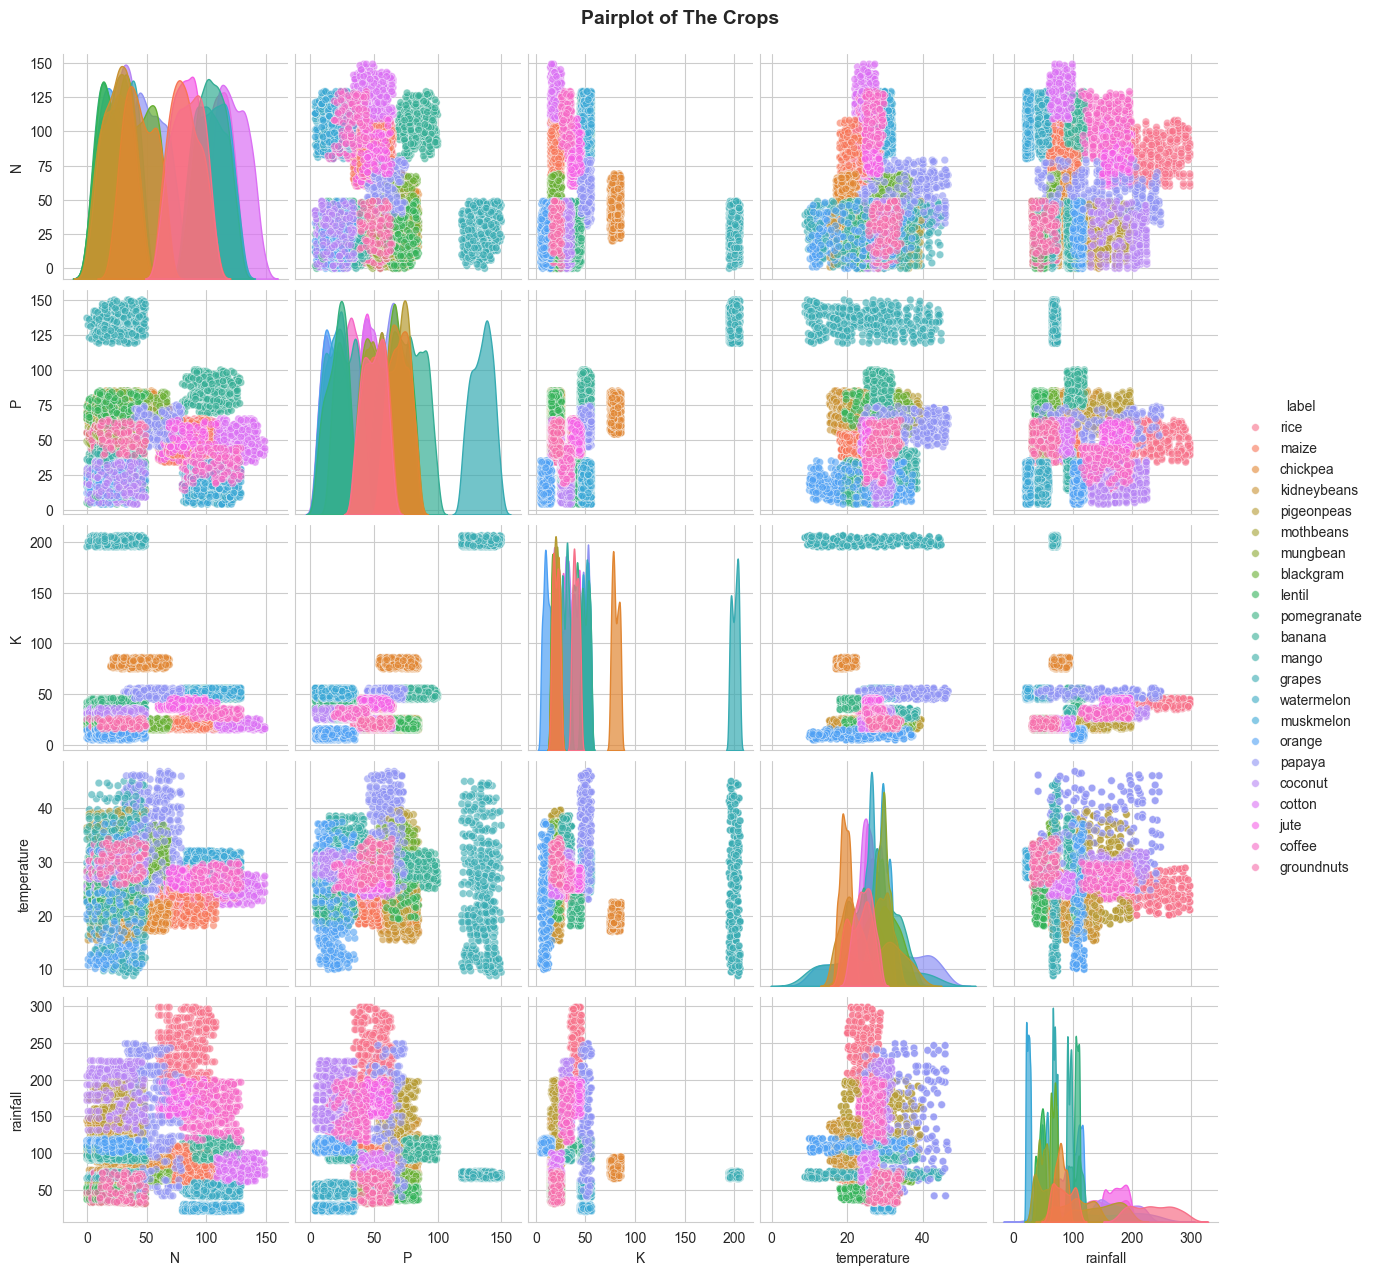

In [53]:
# Pairplot for all crops 
df = pd.read_csv('../data/raw/Crop_recommendation.csv')

crops = df['label'].value_counts().head(22).index
df_subset = df[df['label'].isin(crops)]

# Select key features
key_features = ['N', 'P', 'K', 'temperature', 'rainfall', 'label']
df_pairplot = df_subset[key_features]

print(f"Creating pairplot for the crops: {', '.join(crops)}")
print("This may take a moment...")

pairplot = sns.pairplot(df_pairplot, hue='label', diag_kind='kde', 
                        plot_kws={'alpha': 0.6, 's': 30}, 
                        diag_kws={'alpha': 0.7})
pairplot.fig.suptitle('Pairplot of The Crops', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('../results/figures/pairplot_crops.png', dpi=300, bbox_inches='tight')
plt.show()

The pairplot reveals that while certain crops exhibit distinguishable patterns along individual features (notably K and P), most crops significantly overlap across the multi-dimensional feature space. This indicates weak linear separability, suggesting that linear models are unlikely to achieve high classification accuracy. Non-linear models such as Random Forests, Gradient Boosting, or kernelized SVMs are more appropriate, as they can capture complex decision boundaries and interactions among features. Additionally, feature scaling and careful handling of multi-class classification are recommended.

Creating pairplot for top 11 crops: rice, maize, chickpea, kidneybeans, pigeonpeas, mothbeans, mungbean, blackgram, lentil, pomegranate, banana
This may take a moment...


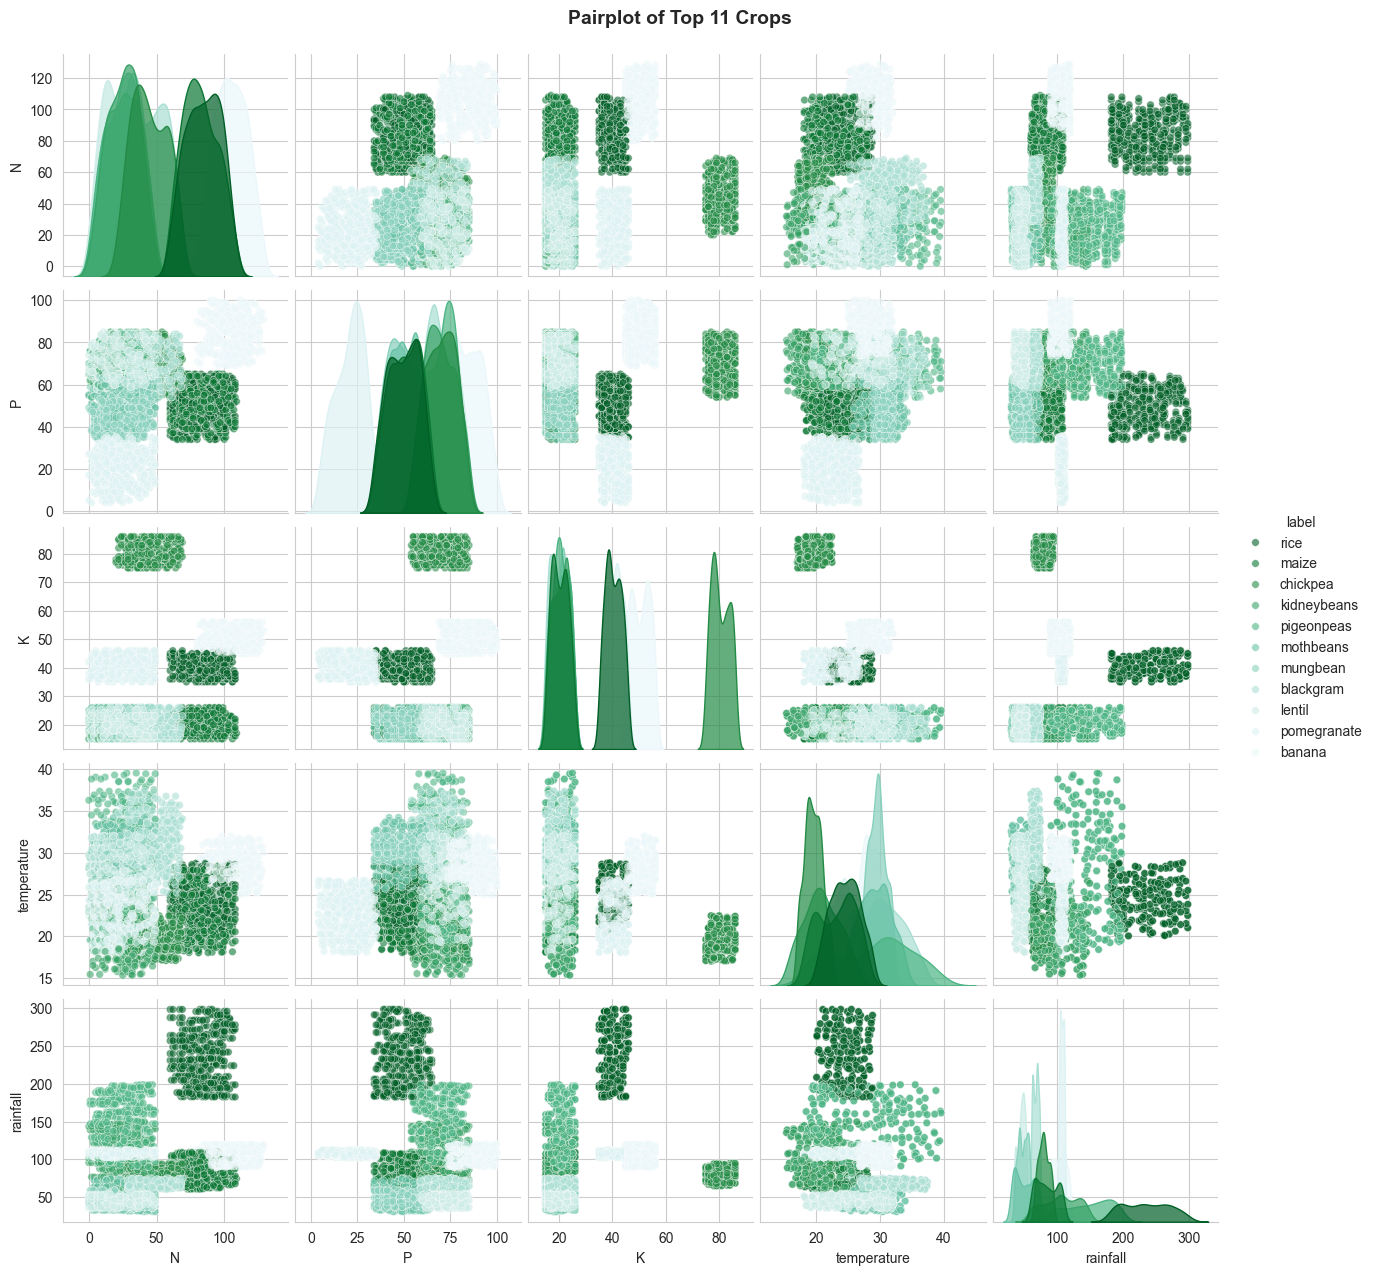

In [54]:
# Pairplot for top 11 crops 
top_11_crops = df['label'].value_counts().head(11).index
df_subset = df[df['label'].isin(top_11_crops)]

# Select key features
key_features = ['N', 'P', 'K', 'temperature', 'rainfall', 'label']
df_pairplot = df_subset[key_features]

print(f"Creating pairplot for top 11 crops: {', '.join(top_11_crops)}")
print("This may take a moment...")

pairplot = sns.pairplot(df_pairplot, hue='label', diag_kind='kde', palette='BuGn_r',
                        plot_kws={'alpha': 0.6, 's': 30}, 
                        diag_kws={'alpha': 0.7})
pairplot.fig.suptitle('Pairplot of Top 11 Crops', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('../results/figures/pairplot_top11_crops.png', dpi=300, bbox_inches='tight')
plt.show()

### ***linear separability***

**Projections:**

Simple linear models (like Logistic Regression, Linear SVM) would struggle to accurately classify crops

Decision boundaries would need to be complex and non-linear

High misclassification rates likely with linear classifiers

### **Cleaned data**

In [55]:
# Save cleaned data for next steps
df.to_csv('../data/processed/crop_data_cleaned.csv', index=False)
print(" Cleaned data saved to 'data/processed/crop_data_cleaned.csv'")


print("DATA EXPLORATION COMPLETE!")
print()
print(f"Dataset shape: {df.shape}")
print(f"Features: {len(features)}")
print(f"Crops: {df['label'].nunique()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Visualizations saved to: results/figures/")


 Cleaned data saved to 'data/processed/crop_data_cleaned.csv'
DATA EXPLORATION COMPLETE!

Dataset shape: (8800, 8)
Features: 7
Crops: 22
Missing values: 0
Visualizations saved to: results/figures/
